In [14]:
import numpy as np

k = 2
def convert_to_SS(a, b0):

    A = np.zeros((k,k))
    A[0: (k - 1), 1:k] = np.eye(k - 1) # 1..n-1 rows and 2..k columns are identity matrix
    A[k - 1, 0:] = -a #last row is a multiplied by -1, because of right hand side

    B = np.zeros(k)
    B[k - 1] = b0
    return A, B

    
a = np.array([-3,2,1]) # k + 1, because indexes are from 0 to k
b0 = np.random.rand(1)
print("ODE with following random coefficients:", a, end = '')
print("and b0:",b0)


b0 = b0/a[k]
a = a[:k] / a[k] # a0 to ak-1 divided to a_k 


A,B = convert_to_SS(a,b0)

print("matrix A:", A)
print("matrix B:", B)


ODE with following random coefficients: [-3  2  1]and b0: [0.50495546]
matrix A: [[ 0.  1.]
 [ 3. -2.]]
matrix B: [0.         0.50495546]


Text(0, 0.5, 'x')

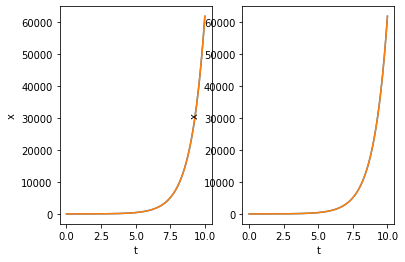

In [15]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math
def rhs(t):
    return math.sin(4*t)

def solveODE(x, t):
    dx = np.zeros(k)
    dx[0:(k-1)] = x[1:k]    
    dx[k-1] = -a.dot(x) + rhs(t)
    return dx

def solveSS(x, t):
    return A.dot(x) + rhs(t)

t = np.linspace(0, 10, 5000)
x0 = np.array([3, 2])

sol1 = odeint(solveODE, x0, t)
sol2 = odeint(solveSS, x0, t)


plt.subplot(1,2,1)
plt.plot(t, sol1)
plt.xlabel('t')
plt.ylabel('x')


plt.subplot(1,2,2)
plt.plot(t, sol1)
plt.xlabel('t')
plt.ylabel('x')

In [18]:
e, v = np.linalg.eig(A)
print(e)

[ 1. -3.]
